# Preamble 

In [1]:
import astropy

In [2]:
%load_ext autoreload
%autoreload 2
%aimport
# %reload_ext autoreload

import sys 
from os.path import abspath
paths = [abspath('../..'), "/home/imendoza/alcca/nbody-relaxed/packages/minnow"]

for path in paths: 
    if path not in sys.path: 
        sys.path.insert(0, path)

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import re 
from astropy.table import Table
import astropy.table

from relaxed import utils 
from relaxed.frames import params, catalogs, filters
from relaxed.progenitors import progenitors

Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
%matplotlib inline

In [5]:
prog_file = '/home/imendoza/alcca/nbody-relaxed/data/trees_bolshoi/progenitors.txt'
prog_generator = progenitors.get_prog_lines_generator(prog_file)
# there are like 382474 main lines (in the filtered version)

In [6]:
# produced by --summary option from a /bin file 
prog_table_file = '/home/imendoza/alcca/nbody-relaxed/data/trees_bolshoi/progenitors.csv'
pcat = Table.read(prog_table_file)

In [7]:
#load catalog we know and love (kindof)
# produced by --summary option from a /bin file 
prog_table_file = '/home/imendoza/alcca/nbody-relaxed/data/trees_bolshoi/progenitors.csv'
cat_filepath = Path('/home/imendoza/alcca/nbody-relaxed/data/Bolshoi/'
                    'minh/hlist_1.00035.minh')
name = 'BolshoiP'
hcat = catalogs.HaloCatalog(cat_filepath, name, verbose=True, add_subhalo=True, add_progenitor=prog_table_file)
hcat.load_base_cat()
cat = hcat._cat

/home/imendoza/alcca/nbody-relaxed/relaxed/frames/catalogs.py:205: UserWarning: Ignoring dividing by zero and invalid errors that should be filtered out anyways.
  "Ignoring dividing by zero and invalid errors that should "


0
extracting subhalo properties
Adding progenitor properties


/home/imendoza/alcca/nbody-relaxed/relaxed/frames/catalogs.py:262: UserWarning: We only include parameters in `params.default_params_to_include`
  "We only include parameters in `params.default_params_to_include`"


# Prepare additional catalogs 

In [8]:
from relaxed.visualize import plots1

In [9]:
#declare additional catalogs, all are of course automatically loaded when created in this way
colors = ['r','b', 'g']

print('total: ', len(hcat))

log_func = lambda x: np.log10(x)
hcat_m11 = catalogs.HaloCatalog.create_filtered_from_base(hcat, 
                                                          filters.get_bound_filter('mvir',high=11.22, modifier=log_func), 
                                                          label="M11")
hcat_m12 = catalogs.HaloCatalog.create_filtered_from_base(hcat, 
                                                          filters.get_bound_filter('mvir',12,12.2, modifier=log_func),
                                                          label="M12")
hcat_m13 = catalogs.HaloCatalog.create_filtered_from_base(hcat, 
                                                          filters.get_bound_filter('mvir',13, 14, modifier=log_func),
                                                          label="M13")

print(len(hcat_m11), len(hcat_m12), len(hcat_m13))
# 500 haloes are so > 13.75 

power_cat = catalogs.HaloCatalog.create_relaxed_from_base(hcat, 'power2011')
neto_cat = catalogs.HaloCatalog.create_relaxed_from_base(hcat, 'neto2007')
print(len(power_cat), len(neto_cat))

total:  298727
17367 19726 5506
189330 231473


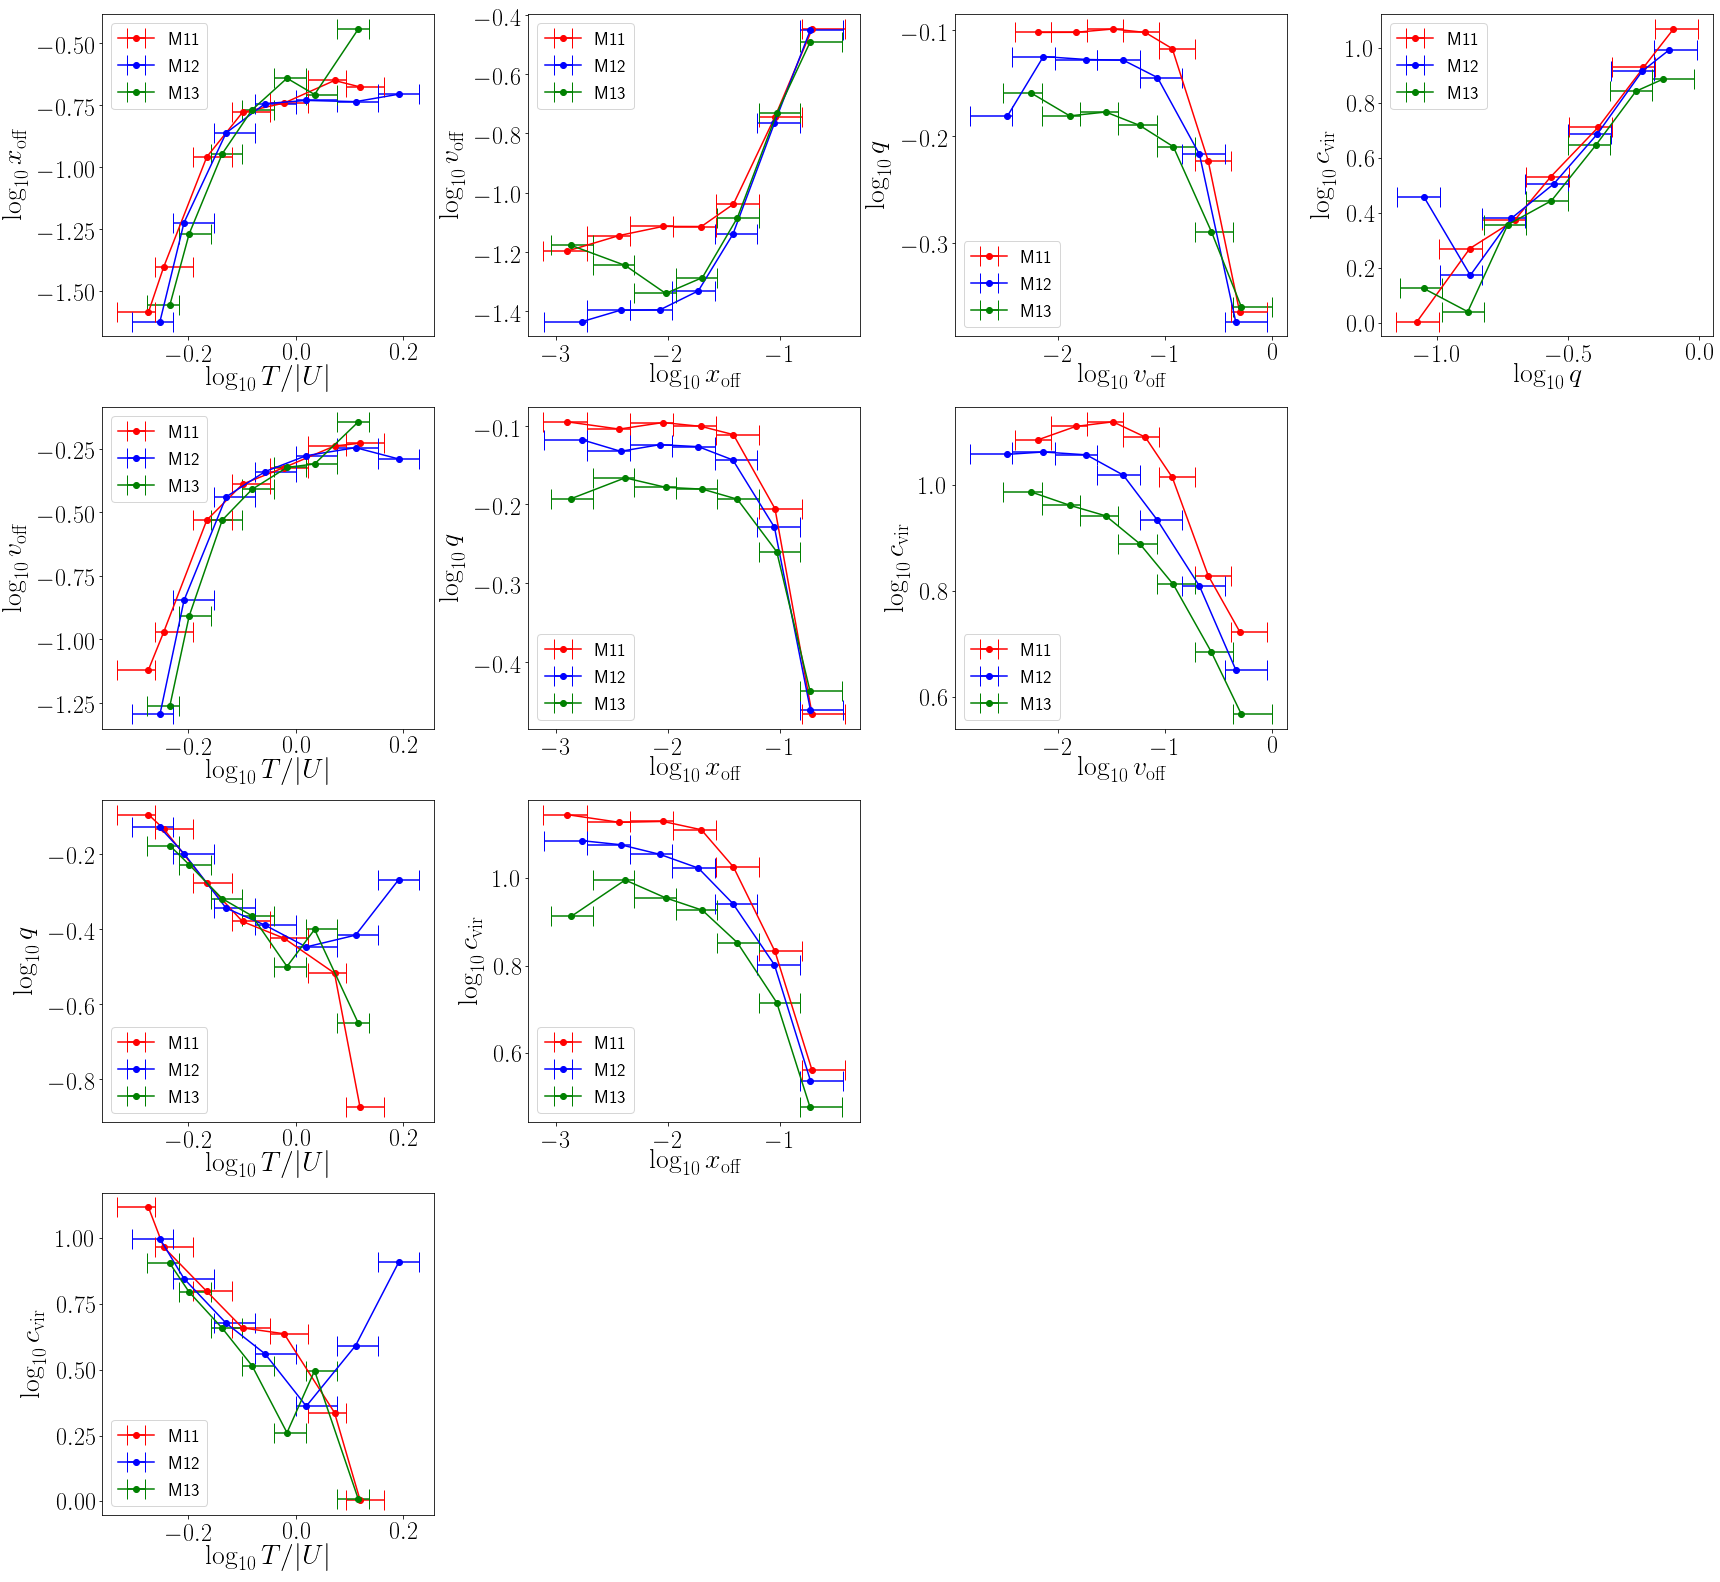

In [14]:
out='test1.pdf'
plt.rc("text", usetex=True)
hcats1 = [hcat, power_cat, neto_cat]
hcats2 = [hcat_m11, hcat_m12, hcat_m13]
colors = ['r', 'b', 'g']

# with PdfPages(utils.figure_path.joinpath(out)) as pdf:
#     plots1.plot_with_mass1(hcats1, None, colors)
#     plots1.plot_mean_centered_hists(hcats2, None, colors) 
#     plots1.plot_correlation_matrix_basic(hcats2, None)
plots1.plot_decades_basic(hcats2, None, colors=colors)
